# Open Food Facts: the carbon “food-print” we do not eat

## Abstract
<i>Everything we do has a carbon footprint, and our diet is no exception. From growing, farming, processing and packaging our food, energy and organic resources are consumed and released, which reflects in the emission of greenhouse gases, like CO<sub>2</sub>. In our project, we analyze the processed foods industry - its manufacturing, product composition, and sales - for the main sources of carbon emissions, using the Open Food Facts dataset. We explain the carbon footprint repartition, starting on an understanding of the products, followed by the breakdown of production countries as well as point of sales and evaluating trends in diet composition, with a special focus on nutritionally high marked products in France and the UK. 

With this study, we want to provide a better understanding of the agri-food industry, and eventually help reducing carbon emissions.</i>

In this notebook, we are performingt the above analysis on the OpenFoodFacts database, which we pre-processed using the __Open Food Facts - Cleanse Data__ notebook in the main directory.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Import-cleansed-data" data-toc-modified-id="Import-cleansed-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import cleansed data</a></span></li><li><span><a href="#Analyse-data" data-toc-modified-id="Analyse-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse data</a></span><ul class="toc-item"><li><span><a href="#Production-/-manufacture-impact" data-toc-modified-id="Production-/-manufacture-impact-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Production / manufacture impact</a></span><ul class="toc-item"><li><span><a href="#Global-distribution-of-global-food-producers" data-toc-modified-id="Global-distribution-of-global-food-producers-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Global distribution of global food producers</a></span><ul class="toc-item"><li><span><a href="#Which-are-the-dominant-global-food-producers-and-manufacturers?" data-toc-modified-id="Which-are-the-dominant-global-food-producers-and-manufacturers?-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Which are the dominant global food producers and manufacturers?</a></span></li><li><span><a href="#How-is-this-distribution-impacted-when-we-consider-neutral-and-large-carbon-footprint-products?" data-toc-modified-id="How-is-this-distribution-impacted-when-we-consider-neutral-and-large-carbon-footprint-products?-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>How is this distribution impacted when we consider neutral and large carbon footprint products?</a></span></li></ul></li><li><span><a href="#Case-study:-Palm-oil" data-toc-modified-id="Case-study:-Palm-oil-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Case study: Palm oil</a></span><ul class="toc-item"><li><span><a href="#Can-we-observe-any-trend-in-the-number-of-products-including-this-oil-(assuming-a-strong-dependence-between-date-the-product-was-added-to-the-database-and-data-the-product-was-invented)?" data-toc-modified-id="Can-we-observe-any-trend-in-the-number-of-products-including-this-oil-(assuming-a-strong-dependence-between-date-the-product-was-added-to-the-database-and-data-the-product-was-invented)?-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Can we observe any trend in the number of products including this oil (assuming a strong dependence between date the product was added to the database and data the product was invented)?</a></span></li><li><span><a href="#Which-country-use-palm-oils-for-production?" data-toc-modified-id="Which-country-use-palm-oils-for-production?-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>Which country use palm oils for production?</a></span></li></ul></li></ul></li><li><span><a href="#Good-nutrition-impact" data-toc-modified-id="Good-nutrition-impact-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Good nutrition impact</a></span><ul class="toc-item"><li><span><a href="#High-nutrional-products" data-toc-modified-id="High-nutrional-products-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>High-nutrional products</a></span><ul class="toc-item"><li><span><a href="#Has-there-been-a-surge-in-high-graded-Products-in-the-UK-/-France-over-the-past-years?" data-toc-modified-id="Has-there-been-a-surge-in-high-graded-Products-in-the-UK-/-France-over-the-past-years?-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Has there been a surge in high graded Products in the UK / France over the past years?</a></span></li></ul></li><li><span><a href="#High-nutrional-products" data-toc-modified-id="High-nutrional-products-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>High-nutrional products</a></span><ul class="toc-item"><li><span><a href="#What-are-those-products-made-of?" data-toc-modified-id="What-are-those-products-made-of?-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>What are those products made of?</a></span></li><li><span><a href="#Where-do-these-product-come-from-and-where-are-they-manufactured?" data-toc-modified-id="Where-do-these-product-come-from-and-where-are-they-manufactured?-3.2.2.2"><span class="toc-item-num">3.2.2.2&nbsp;&nbsp;</span>Where do these product come from and where are they manufactured?</a></span></li><li><span><a href="#Where-are-those-products-sold?" data-toc-modified-id="Where-are-those-products-sold?-3.2.2.3"><span class="toc-item-num">3.2.2.3&nbsp;&nbsp;</span>Where are those products sold?</a></span></li></ul></li><li><span><a href="#Carbon-footprint-of-nutrionally-high-graded-products" data-toc-modified-id="Carbon-footprint-of-nutrionally-high-graded-products-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Carbon footprint of nutrionally-high graded products</a></span><ul class="toc-item"><li><span><a href="#Is-there-a-general-correlation-between-high-carbon-footprint-and-price?" data-toc-modified-id="Is-there-a-general-correlation-between-high-carbon-footprint-and-price?-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Is there a general correlation between high carbon footprint and price?</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from scipy import stats
from datetime import datetime

import json
import pickle

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%load_ext autoreload
%autoreload 2
    
import libs.exploring as explore
import libs.visualising as visualize
import libs.cleansing as cleanse

# Set up plotly environment
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.tools as tls
init_notebook_mode(connected=True)

Command to import the link for the website

In [2]:
tls.get_embed('https://plot.ly/~maxencedraguet/25/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~maxencedraguet/25.embed" height="525" width="100%"></iframe>'

## Import cleansed data

In [3]:
# Import data
open_food_facts_csv_file = "./data/openfoodfacts_clean.csv"

food_facts_pd = pd.read_csv(open_food_facts_csv_file,
                            delimiter="\t")

In [4]:
# Change column data types
food_facts_pd['carbon-footprint_100g'] = food_facts_pd['carbon-footprint_100g'].apply(pd.to_numeric, args=('coerce',))
food_facts_pd['energy_100g'] = food_facts_pd['energy_100g'].apply(pd.to_numeric, args=('coerce',))
food_facts_pd['price_per_100g'] = food_facts_pd['price_per_100g'].apply(pd.to_numeric, args=('coerce',))
food_facts_pd['created_datetime'] = food_facts_pd['created_datetime'].apply(pd.to_datetime, args=('coerce',))

In [5]:
food_facts_pd.head(5)

Unnamed: 0           code   created_t    created_datetime  \
0           0  0000000274722  1514659309 2017-12-30 18:41:49   
1           1  0000000394710  1484497370 2017-01-15 16:22:50   
2           2  0000001071894  1409411252 2014-08-30 15:07:32   
3           3  0000001938067  1484501528 2017-01-15 17:32:08   
4           4  0000004302544  1488464896 2017-03-02 14:28:16   

                        product_name            quantity           packaging  \
0  Blanquette de Volaille et son Riz                 NaN    carton,plastique   
1     Danoises à la cannelle roulées            1.150 kg               Frais   
2                              Flute                 NaN  Paper,plastic film   
3       Chaussons tressés aux pommes            1.200 kg               Frais   
4                Pain Burger Artisan  1.008 kg / 12 pain     Frais,plastique   

               brands                                      categories_en  \
0        Comme J’aime  Meals,Meat-based products,Meals with meat,Poul...   
1  Kirkland Signature          Sugary snacks,Biscuits and cakes,Pastries   
2            Waitrose  Plant-based foods and beverages,Plant-based fo...   
3  Kirkland Signature          Sugary snacks,Biscuits and cakes,Pastries   
4  Kirkland Signature                                           boulange   

   origins       ...         \
0  Unknown       ...          
1   France       ...          
2   Canada       ...          
3   France       ...          
4   Canada       ...          

                                    ingredients_text  main_category  \
0  Riz précuit 40,4 % (eau, riz, huile de colza, ...          Meats   
1  Ingrédients: Pâte (farine, eau, beurre, sucre,...  Sugary snacks   
2                                              Wheat    Plant-based   
3  Ingrédients : Pâte (farine, margarines d'huile...  Sugary snacks   
4  Ingrédients : Farine, eau, sel, levure, orge m...       Boulange   

  energy_100g carbon-footprint_100g nutrition-score-fr_100g  \
0       450.0                   NaN                     0.0   
1      1520.0                   NaN                     NaN   
2         NaN                   NaN                     NaN   
3      1090.0                   NaN                     9.0   
4      1160.0                   NaN                     1.0   

   nutrition-score-uk_100g  price_per_100g  store_currency  \
0                      0.0             NaN             NaN   
1                      NaN             NaN             NaN   
2                      NaN             NaN             NaN   
3                      9.0             NaN             NaN   
4                      1.0             NaN             NaN   

   manufacturing_place  purchase_places  
0               France           France  
1               France           France  
2              Unknown           Canada  
3       United Kingdom   United Kingdom  
4              Unknown           Canada  

[5 rows x 23 columns]

Additionally to the OpenFoodFact dataset, we obtained an extract of the Eaternity dataset hosted by the ETH Zurich, which contains 692 more products and their CO2 footprint. Unfortunately, these products are not contained in the OpenFoodFacts database, so we lack manufacturing and purchasing information as well as the OpenFoodFacts categories for this set.

In [6]:
# Import data
carbon_footprint_csv_file = "./data/carbon_footprint_categories.csv"

carbon_footprint_pd = pd.read_csv(carbon_footprint_csv_file, delimiter=",")
carbon_footprint_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 13 columns):
Unnamed: 0                      682 non-null int64
ID                              682 non-null int64
Title                           682 non-null object
Weight [gram/serving]           682 non-null int64
CO2-Value [gram CO2/serving]    682 non-null float64
CO2 rating                      682 non-null float64
FAT                             682 non-null float64
WATER                           682 non-null float64
ENERC                           682 non-null float64
PROT                            682 non-null float64
category                        682 non-null object
parent_category                 682 non-null object
category_en                     682 non-null object
dtypes: float64(6), int64(3), object(4)
memory usage: 69.3+ KB


In [7]:
carbon_footprint_pd.head(10)

Unnamed: 0             ID  \
0           0  4300175162708   
1           1  4388840231829   
2           2  8690777653008   
3           3  4311527608225   
4           4  7610632971826   
5           5  4316268432429   
6           6  4032600122055   
7           7  4005009101204   
8           8  4003880685257   
9           9  4311596464074   

                                              Title  Weight [gram/serving]  \
0                     K Classic - Junger Gemüsemais                    100   
1                                    ja! Gemüsemais                    100   
2                                        Sera Ajvar                    100   
3                     Edeka Ackergold Mehligkochend                    100   
4                        Bio Kartoffeln festkochend                    100   
5                           Botato Kartoffel Wedges                    100   
6  Pfanni Kartoffel Püree besonders locker 3 x 80 g                    100   
7                                    Kartoffelpüree                    100   
8                 Agrarfrost Germany Knusper Frites                    100   
9    Backofen Rösti Ecken - aus Qualitätskartoffeln                    100   

   CO2-Value [gram CO2/serving]  CO2 rating        FAT      WATER  \
0                           9.0      20.812   3.480252  52.999834   
1                          17.0      37.941   2.312597  35.218431   
2                          44.0      61.076  11.526800  22.286400   
3                          11.0      67.383   0.100000  78.700000   
4                          11.0      67.383   0.100000  78.700000   
5                          20.0      71.343   4.032246  70.485923   
6                          12.0      73.344   0.099000  77.913000   
7                          14.0      82.441   0.197999  75.754800   
8                          22.0      84.098   5.488000  73.978000   
9                          23.0      87.815   5.393437  72.587372   

         ENERC       PROT                               category  \
0   765.655520   8.601195                        Gemüsekonserven   
1  1070.401621   5.715417                        Gemüsekonserven   
2  1276.524000  12.058200          Gemüsaufstriche &amp; -salate   
3   320.000000   2.000000                             Kartoffeln   
4   320.000000   2.000000                             Kartoffeln   
5   512.666890   3.501101  Kartoffelbeilagen &amp; Pommes Frites   
6   316.800000   1.980000  Kartoffelbeilagen &amp; Pommes Frites   
7   310.801700   2.129955                    Knödel &amp; Pürees   
8   500.600000   1.880000  Kartoffelbeilagen &amp; Pommes Frites   
9   488.711426   1.947783  Kartoffelbeilagen &amp; Pommes Frites   

  parent_category          category_en  
0   gemuese_pilze  vegetable mushrooms  
1   gemuese_pilze  vegetable mushrooms  
2   gemuese_pilze  vegetable mushrooms  
3   gemuese_pilze  vegetable mushrooms  
4   gemuese_pilze  vegetable mushrooms  
5   gemuese_pilze  vegetable mushrooms  
6   gemuese_pilze  vegetable mushrooms  
7   gemuese_pilze  vegetable mushrooms  
8   gemuese_pilze  vegetable mushrooms  
9   gemuese_pilze  vegetable mushrooms

## Analyse data

Before we analyse the data, we have to some confesssions to make:

The data that we loaded into this notebook was already preprocessed in the "Open Food Facts - Cleanse data" notebook, that can be found in the same directory. In there we translated countries, labels, and categories and formatted and matched tags. However, we also droped more than 90% of the data set, because the data points were not complete for the purpose of our analysis.

OpenFoodFacts was initiated in France, and products sold in france are dominantly represented in this data set. Moreover, most of the products are sold in Europe or industrial nations, and we have no or only sparse data about the African, Asian, Australian, and South-american continent, which excludes the majority of the world population and especially the societes in Asia and Africa, that undergo the most decisive transformations at the moment.

Further, we only have qualitative data about the products, but no quantities that are produced and purchased world wide, hence we cannot provide a scale for all the insights that we gain throughout this notebook.

What we are trying to say is, that the data is under no circumstances representive to analyse the the research questions that we have posed. However, we will provide the methods to perform this analysis on this comprised dataset, and see what kind of insights we can already squeek out of it.

### Production / manufacture impact

#### Global distribution of global food producers

In [8]:
countries_label = pd.read_csv("./data/country_lookup.csv")[['name', 'cca3']]     

##### Which are the dominant global food producers and manufacturers?

- From where are those products originating?

In [9]:
visualize.plot_occurences_on_map(df=food_facts_pd, 
                                 column_key='origins',
                                 show_distances=False,
                                 title='Countries of origin for products')

Note that country in purple are  not assigned any value. 

- Where are those products manufactured?

In [10]:
visualize.plot_occurences_on_map(df=food_facts_pd, 
                                 column_key='manufacturing_place',
                                 show_distances=False,
                                 title='Manufacturing countries of products')

- Where are those products bought?

In [11]:
visualize.plot_occurences_on_map(df=food_facts_pd, 
                                 column_key='purchase_places',
                                 show_distances=False,
                                 title='Purchase countries of products')

In conclusion, we note that we mainly have data for "western" countries, with a <b> huge bias toward France</b>. We mostly lack information for country in Africa and the centre of Asia. Our dataset is thus clearly not a truthful representation of the world. We shall therefore restrict our analysis to the case of France, meaning purchases countries will be limited to the case of France. [This category was selected since it is the most furnished one.] 

This is carried out in the next cell. Note that <i> purchases_places </i> is only requested to contain 'France' as one of the entries in its list. There could thus be other countries still contained in the <i> purchases_places </i> column. 

In [12]:
food_facts_pd['filter'] = food_facts_pd.purchase_places.apply(lambda l: explore.filter_france(l))
food_facts_pd = food_facts_pd[food_facts_pd['filter'] == 'France'].drop(columns=['filter'])

##### How is this distribution impacted when we consider neutral and large carbon footprint products? 

In [13]:
# dataset carbon footprint coming from Eaternity
# This will be assess in future version of this project


#### Case study: Palm oil

##### Can we observe any trend in the number of products including this oil (assuming a strong dependence between date the product was added to the database and data the product was invented)?

In [14]:
#extracting products with palm oil 
palm_oil_pd = food_facts_pd[food_facts_pd.ingredients_text.str.contains("palm").fillna(value=False)]

In [15]:
print('{0:.2f} % of the products in the dataset contain palm oil'.format(palm_oil_pd.shape[0]/food_facts_pd.shape[0]*100))

5.01 % of the products in the dataset contain palm oil


In [16]:
#palm_oil_pd.groupby('main_category')
palm_oil_pd['created_yyyy'] = palm_oil_pd["created_datetime"].dt.year

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
#plotly.tools.set_credentials_file(username='ninatubau', api_key='z75HqORQkKdVL98Fi0tX')


In [18]:
palm_oil_over_time = palm_oil_pd['created_yyyy'].value_counts()

In [19]:
data = [go.Bar(x=palm_oil_over_time.index,
            y=palm_oil_over_time.values)]

layout = go.Layout(
    title='Usage of palm oil over time',
    xaxis=dict(
        title='time (years)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='number of products with palm oil',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='jupyter-basic_bar')

There is a clear tendancy of using palm oil in products from 2012 up to now. Also, we notice a large increase in the palm oil products these lasts years. 

##### Which country use palm oils for production?

In [20]:
a = palm_oil_pd.origins.groupby(palm_oil_pd.origins).sum

In [21]:
visualize.plot_column_composition(palm_oil_pd, 'manufacturing_place' )

key  value
0   United Kingdom  156.0
7          Unknown  127.0
3            Italy   70.0
1          Germany   54.0
11         Belgium   33.0
12           Spain   15.0
2      Netherlands   11.0
22     Switzerland   11.0
26           China    8.0
17          Greece    7.0
16          Poland    6.0
9          Vietnam    4.0
32        Thailand    4.0
29        Portugal    4.0
15         Ireland    3.0
39       Sri Lanka    2.0
28         Bolivia    2.0
25           Japan    2.0
44           Niger    2.0
42   French Guiana    2.0
35         Réunion    2.0
31         Algeria    2.0
23          Cyprus    2.0
45            Peru    2.0
20   United States    2.0
4           Norway    2.0
10         Denmark    1.0
36          Taiwan    1.0
43      Luxembourg    1.0
5            Kenya    1.0
41          Turkey    1.0
40     Philippines    1.0
6     South Africa    1.0
38         Namibia    1.0
37           Samoa    1.0
21          Canada    1.0
8          Iceland    1.0
24       Venezuela    1.0
33          Sweden    1.0
13       Mauritius    1.0
30        Slovakia    1.0
14         Moldova    1.0
18            Iran    1.0
27         Austria    1.0
19            Laos    1.0
34         Unknown  127.0

0
1
2
3
4
5


In [22]:
visualize.plot_occurences_on_map(df=food_facts_pd, 
                                 column_key='manufacturing_place',
                                 show_distances=True,
                                 title='Manufacturing countries of products')

### Good nutrition impact

In [23]:
nutrition_fr = food_facts_pd[['product_name',
                              'created_datetime',
                              'nutrition-score-fr_100g', 
                              'product_name', 
                              'main_category', 
                              'origins', 
                              'purchase_places', 
                              'manufacturing_place',
                              'stores']
                            ]

nutrition_fr = nutrition_fr[nutrition_fr['nutrition-score-fr_100g'].notna()]
nutrition_over_time = nutrition_fr.sort_values(by = 'created_datetime')
nutrition_over_time['main_category'] = nutrition_over_time.main_category.fillna(value='Unknown')

Meaning of the nutrition score index can be found at https://world.openfoodfacts.org/nutriscore. The main facts are the following : 
- Products are marked according to the amount of nutrients they contain [per 100 g] and given a grade between A and E (A being obviously the best mark).

<img src="Images/nutriscore.png" height="540" width="336">

- If the product is solids, this is linked to a nutrition score as displayed the next table. This score itself is computed with two parts. The first one considers the energy, saturated fat, sugars and sodium. A high level in that category is considered unhealthy. The second part reflects the proportion of fruits, vegetables and nuts, fibers and proteins for which high levels are considered beneficial to the health.

<img src="Images/nutriscore_table.png" height="1000" width="900">



In [24]:
#Assigning the grades
nutrition_over_time["nutrition_grade"] =\
                                    nutrition_over_time[['nutrition-score-fr_100g','main_category']].\
                                    apply(explore.assign_score, axis=1)


#### High-nutrional products

##### Has there been a surge in high graded Products in the UK / France over the past years?

In [25]:
nutrition_over_time_reduced = explore.nutrition_grade(nutrition_over_time)

#### High-nutrional products

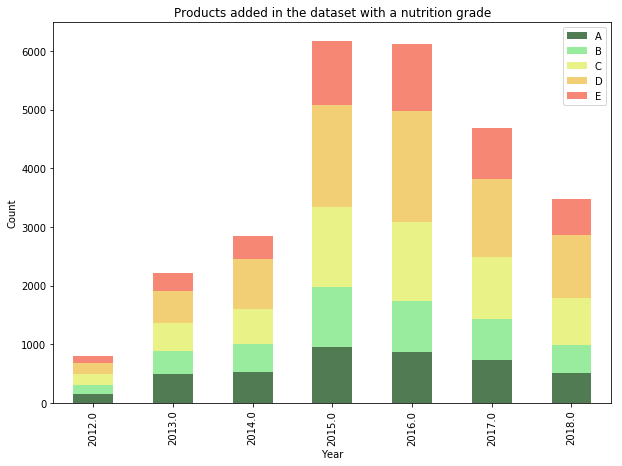

In [26]:
visualize.make_grade_stacked_bar(nutrition_over_time_reduced, 'nutrition_grade', 'year', 'Count')                        

We observe that, as time passes, more products are being added with a nutritional grade, with a peak occurring during the years 2015-2016.

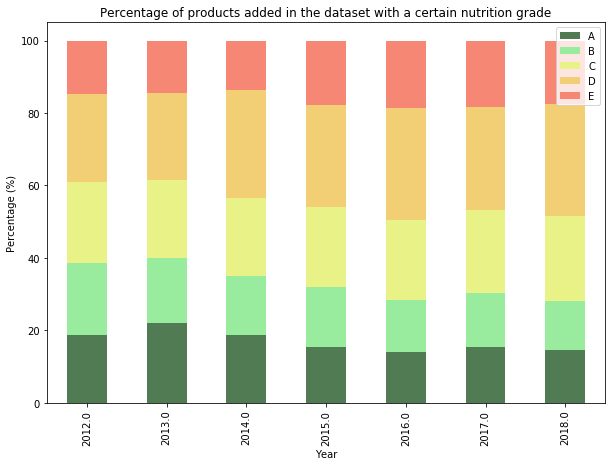

In [27]:
visualize.make_grade_stacked_bar(nutrition_over_time_reduced, 'nutrition_grade', 'year', 'Percentage')

We observe that the percentage of prevalence of each grade has been mostly maintained during the last six years with a barely noticeable peak in 2013 for grade 'A'. 

In [28]:
df = nutrition_over_time_reduced

In [29]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'Nutrtion Grade'}
figure['layout']['yaxis'] = {'title': '# Products'}
figure['layout']['hovermode'] = 'closest'

# add play and pause button
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

# define slider
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [30]:
year = 2018
trace = go.Bar(
    x = df[df['year']==year].nutrition_grade.values,
    y = df[df['year']==year].Count.values,
    marker = dict(
        color = ["#008010", "#9ACD32","#FFD700", "#FF8C00", "#DB4832"]
        ),
    )

figure['data'].append(trace)

In [31]:
for year in sorted(df.year.unique()):
    
    frame = {'data': [], 'name': str(year)}
    trace = go.Bar(
        x = df[df['year']==year].nutrition_grade.values,
        y = df[df['year']==year].Count.values,
        marker = dict(
            color = ["#008010", "#9ACD32","#FFD700", "#FF8C00", "#DB4832"]
            ),
    )
    
    frame['data'].append(trace)
    figure['frames'].append(frame)
    
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': int(year),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

In [32]:
iplot(figure, filename='nutrition_grades')

##### What are those products made of?
What is the composition? Do they contain many additives?  Where are these products sold? 

This plot displays the most common categories in the list of product possessing a nutritional index

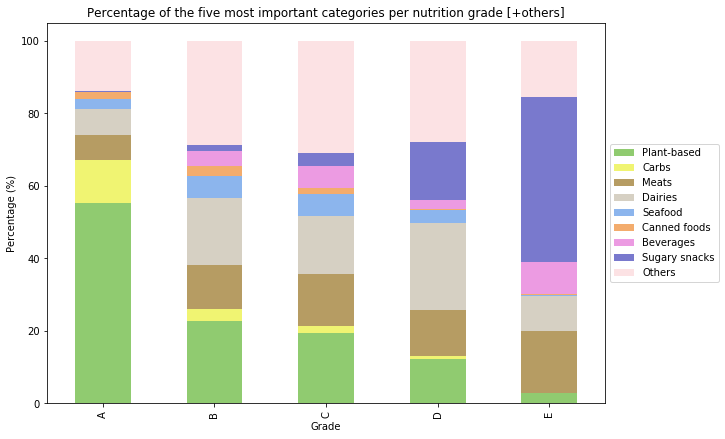

In [33]:
visualize.make_content_stacked_bar(visualize.plot_grade_content(nutrition_over_time), 'keys', 'grade', 'Percentage')

Observe how good nutritional products are mostly (more than 50%) plant-based and how this category as well as carbs and canned food shrink when considering less beneficial food standards. This reduction is compensated by a sharp increase in prevalence of sugary snacks and a lesser increase of meat-based producs. Both seafood and dairy seem to concentre in, respectevely, the lower and higger part of the middle marks. 

##### Where do these product come from and where are they manufactured?

In [34]:
visualize.plot_column_composition(nutrition_fr, 'purchase_places') 

key  value
0  France  26335

0
1


This plot is of course highly bias towards france since the cut was perform on that column

In [35]:
visualize.plot_column_composition(nutrition_fr, 'manufacturing_place') 

key   value
0                          United Kingdom  2408.0
2                                 Unknown  1760.0
3                                   Italy   881.0
4                                 Germany   686.0
25                                Belgium   626.0
1                                   Spain   382.0
5                             Netherlands   245.0
9                             Switzerland   128.0
23                                  China    95.0
19                               Thailand    84.0
8                                  Greece    82.0
38                                Morocco    79.0
48                                Bolivia    77.0
45                                 Poland    76.0
15                               Portugal    51.0
16                                 Taiwan    51.0
10                          United States    44.0
6                                    Iran    44.0
61                                Vietnam    42.0
33                                  Japan    33.0
17                                 Canada    27.0
14                                 Turkey    25.0
47                                 Sweden    24.0
35                                Iceland    24.0
29                                Denmark    22.0
13                                Ireland    22.0
54                                Austria    22.0
11                                  Niger    22.0
63   United States Minor Outlying Islands    20.0
65                              Sri Lanka    19.0
..                                    ...     ...
86                                Lebanon     2.0
100                        Cayman Islands     2.0
85                                   Laos     2.0
83                                Romania     2.0
51                                 Cyprus     2.0
101                            Madagascar     2.0
71                                  Chile     2.0
60                     Dominican Republic     2.0
59                                Estonia     2.0
58                                Moldova     2.0
56                                Senegal     2.0
46                               Cameroon     2.0
40                              Singapore     2.0
34                           Saint Martin     1.0
94                       French Polynesia     1.0
21                                Myanmar     1.0
99                              Hong Kong     1.0
98                            New Zealand     1.0
27                  São Tomé and Príncipe     1.0
96                               Paraguay     1.0
95                             Costa Rica     1.0
77                               Colombia     1.0
93                                   Togo     1.0
92                            El Salvador     1.0
28                              Australia     1.0
31                           Saudi Arabia     1.0
74                          Liechtenstein     1.0
53                                 Monaco     1.0
82                            Puerto Rico     1.0
89                                Unknown  1760.0

[102 rows x 2 columns]

0
1
2
3
4
5


Naturally, most of the food consumed in France is manufactured there though approximately 30% is produced somewhere else. 

##### Where are those products sold?

In [36]:
visualize.plot_column_composition(nutrition_fr, 'stores')

key  value
20                                           Carrefour   5096
193                                         Magasins U   2281
22                                              Auchan   1997
35                                             Leclerc   1972
11                                         Intermarché   1571
50                                             Super U   1233
175                                         Magasins U   1193
77                                                LIDL   1103
65                                                Cora   1098
23                                            Franprix   1030
5                                              Walmart    988
47                                              Picard    819
203                                             Casino    803
154                                           Monoprix    663
140                                       Leader Price    521
132                                               ALDI    510
84                                                Coop    509
173                                              Netto    458
13                                             Soriana    411
170                                             Migros    367
192                                                Dia    275
130                                                Sky    259
167                                 Banque Alimentaire    255
196                                      Simply Market    246
24                                      Bodega Aurrera    242
180                                        Grand Frais    196
108                                                Noz    193
241                                    Ica Supermarket    176
206                                          U Express    170
263                                              Bio14    163
..                                                 ...    ...
768                             Biscuiterie De Kerlann      1
769                                            Kerlann      1
770                                 La Petite Marquise      1
771                     Carrefour Villiers En Biere 77      1
772                                    Grandeur Nature      1
747                                        Grand'Frais      1
746                                           Biobulle      1
745                                 Mayenne Bio Soleil      1
238                                            Leclere      1
717                                           Leclercq      1
246                           Bon Samaritain Kalgondin      1
719  Raimo Glacier  - 59/63 Boulevard De Reuilly - ...      1
243                                           Pays-Bas      1
723                                           Guérance      1
724                                     Que Du Bonheur      1
725  Http://Www.Labelleiloise.Fr/Fr/Nos-Boutiques/I...      1
726                             La Belle-Iloise Nantes      1
239                                  Secours Populaire      1
731                                                V&B      1
744                                              Zodio      1
732                                   Au Goûter Breton      1
734                                    Epicerie Sofine      1
735                                  Salon Du Chocolat      1
237                    Wikirencontre-17102014-Cedalyon      1
738                       Www.Nosmeilleurescourses.Com      1
739                               Epicer'Ie Vitalienne      1
740                                Supermarchés Casino      1
741                             Carrefour Saint-Pierre      1
742                                    Tft Spécialités      1
650                                 Biscuiterie Penven      1

[1301 rows x 2 columns]

0
1
2
3
4
5


Side fact: [market share grocery stores in France](https://www.statista.com/statistics/535415/grocery-market-share-france/) (October 2017)
    <img src="Images/marketshare_stores_france.png" height="800" width="600">

#### Carbon footprint of nutrionally-high graded products

In this section we investigate the carbon footprint of different products and categories. Therefore, we investigate the OpenFoodFacts dataset. Common sense would suggest most nutritionally-high graded products are organic (plant, fruit, vegetables, …) and are therefore not manufactured, thus having a small footprint. Let's see what story the data has to tell...

But as before, we should be careful as the dataset is biased. So we begin with examing what kind of data is represented in the datasets.

We begin with extracting all the carbon footprint data.

In [37]:
carbon_footprints = food_facts_pd[food_facts_pd['carbon-footprint_100g'].notna() & 
                                  food_facts_pd['carbon-footprint_100g']!=0]
carbon_footprints.main_category.value_counts()

Sugary snacks                             29
Plant-based                               17
Dairies                                   15
Beverages                                  8
Carbs                                      8
Meats                                      7
Seafood                                    6
Frozen foods                               3
Sweeteners                                 2
Groceries                                  2
Meals                                      2
Tortellini-Aux-Epinard-Et-A-La-Ricotta     1
Canned foods                               1
Salty snacks                               1
Name: main_category, dtype: int64

First, we should sensibilize for the data that we are dealing with. Therefore we visualize the origin and composition of the products.

In [38]:
visualize.plot_column_composition(df=carbon_footprints, column_str='manufacturing_place')

key  value
0         Unknown    5.0
2  United Kingdom    5.0
4  Cayman Islands    2.0
8          Sweden    1.0
1           Spain    1.0
3         Bolivia    1.0
5        Thailand    1.0
6         Belgium    1.0
7         Unknown    5.0

0
1
2
3
4
5


Let's if there is a correlation between country of origin, and hence transportation distance, and the carbon footprint. (No use because all products are from France or missing origin information).

In [39]:
visualize.plot_column_composition(df=carbon_footprints, column_str='stores')

key  value
3                      Migros     23
5                      Casino     20
16                  Carrefour     18
11                 Magasins U     12
13                     Auchan     12
9                    Monoprix      9
14                Intermarché      8
12                    Leclerc      7
7                       Géant      7
18                 Magasins U      5
8                        Spar      3
10                    Super U      3
1                    Sarl Ajm      2
4                       Vival      2
2                         Ajm      2
20                    Hyper U      1
23              Food And Wine      1
22  Raiponce F84300 Cavaillon      1
21      Carrefour Lingostière      1
0                 Sami Fruits      1
19              Carrefour Bio      1
17                       Cora      1
15                     Simply      1
6                Géant Casino      1
24                   Kaufland      1

0
1
2
3
4
5


From the above plot, we can observe that the majority of the products are sold in france, and especially the stores in provided by the shops of

Most of the carbon footprint data was produced by the research group around ###, that claims that the processed data was ###.

In [40]:
visualize.plot_column_composition(carbon_footprints, column_str='main_category')

key  value
3                            Sugary snacks     29
0                              Plant-based     17
2                                  Dairies     15
4                                Beverages      8
6                                    Carbs      8
1                                    Meats      7
9                                  Seafood      6
5                             Frozen foods      3
8                                    Meals      2
10                              Sweeteners      2
12                               Groceries      2
7                             Salty snacks      1
11                            Canned foods      1
13  Tortellini-Aux-Epinard-Et-A-La-Ricotta      1

0
1
2
3
4
5


We see that the main categories that we have carbon footprint data of are sugary snacks (mainly plain chocolets) and dairies. This is not surprising since they are made up of only few ingredients. 

In [41]:
# Food calories over carbon-foot print
visualize.plot_cluster_by_tags(df=carbon_footprints,
                               plot2D_features = ["carbon-footprint_100g", "price_per_100g"],
                               cluster="main_category")

The above prices were found from online stores of Walmart, Monoprix, and Migros. It should be noted, that the dataset dominantly contains dairies and sweets with carbon footprint, so we hope to gain more insight of other products from the Carbon Footprint Eaternity dataset.


##### Is there a general correlation between high carbon footprint and price? 

Because the carbon footprint column of the OpenFoodFacts database contains a small amount of data, we will match OpenFoodFacts dataset with the sample given by Eaternity. The approach is the following :
    - Webscrap codeinfo website to get categories and parent categories of each product
    - Translate categories into english
    - Match categories of Open FoodFacts database with parent categories scraped from the website
    - Add the mean value of carbon footprint categories on Open Food Facts database
    

In [42]:
#for the 30 most common categories
food_facts_pd.main_category.value_counts().head(30)

Plant-based                    6795
Dairies                        4830
Sugary snacks                  3890
Meats                          3675
Beverages                      3062
Frozen foods                   1623
Meals                          1153
Seafood                        1122
Groceries                      1036
Carbs                           862
Salty snacks                    670
Canned foods                    369
Sandwiches                      197
Desserts                        183
Sweeteners                      139
Fish And Meat And Eggs          128
Baby Foods                      119
Crêpes And Galettes             107
Vinegars                         75
Dietary Supplements              72
Terrine                          64
Breakfasts                       43
Aliments-D-Origine-Vegetale      42
Pet Food                         30
Pies                             26
Marzipan                         25
Cooking Helpers                  22
Food Additives              

In [43]:
print('Taking into account 30 most important categories represents {0}% of the data'.format(sum(food_facts_pd.main_category.value_counts()[:30])/len(food_facts_pd.main_category)*100))

Taking into account 30 most important categories represents 94.79884072423572% of the data


Dict done by hand to match main categories of the OpenFoodFact dataset with the one's found in the sample of Eternity. 

In [44]:
dict_categories = {
   "Plant-based": ['vegetable mushrooms','fruit berries','soy saitan meat substitute','Grain','nuts','seeds koerner','legumes','nut plant milk'],
    "Dairies": ['Milk, dairy products, eggs','Cheese','ice creme pudding'],
    "Sugary snacks":'confectionery',
    "Meats": 'Fruit and vegetables Meat',
    "Beverages":['Fruit and vegetable juices','Wine and Sparkling Wine','Syrup','cocoa drinking chocolate','Coffee','Mineral water','lemonades refreshment drinks','Milkshakes'],
    "Meals":'fast food whole ready meals',
    "Seafood":'fish sea fruits',
    "Groceries":['mayo ketchup mustard','finished sauces fix products','SPREADS'],
    "Carbs":['rice couscous quinoa co','Baked goods','breadsticks','muesli cereals'],
    "Fish And Meat And Eggs":'Eggs.',
    "Baby Foods":'shred',
    "Aliments-D-Origine-Vegetale":['vegetable mushrooms','fruit berries'],
    "Cooking Helpers": ['cooking ingredients spices','baking ingredients']
}


In [45]:
#computing carbon footprint mean for each parent category of Eaternity database
df_mean_carbon_eaternity = explore.carbon_mean_eaternity(carbon_footprint_pd)

In [46]:
carbon_footprint_pd.category_en.value_counts()

vegetable mushrooms             164
cooking ingredients spices       73
Fruit and vegetables Meat        49
Milk, dairy products, eggs       41
Baked goods                      35
confectionery                    32
breadsticks                      32
rice couscous quinoa co          22
Cheese                           21
fast food whole ready meals      17
shred                            17
muesli cereals                   17
mayo ketchup mustard             16
fruit berries                    14
ice creme pudding                14
finished sauces fix products     12
Fruit and vegetable juices       12
fish sea fruits                  12
baking ingredients               11
soy saitan meat substitute       10
Grain                             8
legumes                           7
seeds koerner                     7
SPREADS                           7
nuts                              7
nut plant milk                    6
Syrup                             4
Wine and Sparkling Wine     

In [47]:
df_mean_carbon_openff = explore.carbon_mean_openff(dict_categories,df_mean_carbon_eaternity)

In [48]:
df_mean_carbon_openff

Plant-based     Dairies  Sugary snacks       Meats   Beverages       Meals  \
0    96.048595  551.237408          174.5  622.714286  411.807778  230.941176   

      Seafood    Groceries      Carbs  Fish And Meat And Eggs  Baby Foods  \
0  299.583333  1234.505265  1061.1444                   219.5        82.0   

   Aliments-D-Origine-Vegetale  Cooking Helpers  
0                  2194.067109      2301.950048

In [49]:
food_facts_pd

Unnamed: 0             code   created_t    created_datetime  \
0               0    0000000274722  1514659309 2017-12-30 18:41:49   
1               1    0000000394710  1484497370 2017-01-15 16:22:50   
7               7    0000010090206  1370977431 2013-06-11 19:03:51   
10             10    0000027533048  1418732915 2014-12-16 12:28:35   
13             13    0000204286484  1483099966 2016-12-30 12:12:46   
17             17           000031  1468014954 2016-07-08 21:55:54   
21             21    0000501050603  1484302351 2017-01-13 10:12:31   
22             22           000051  1480622364 2016-12-01 19:59:24   
25             25         00011686  1424529249 2015-02-21 14:34:09   
27             27         00011709  1423389200 2015-02-08 09:53:20   
29             29         00011754  1496652867 2017-06-05 08:54:27   
31             31         00012444  1494676312 2017-05-13 11:51:52   
37             37         00024280  1506504757 2017-09-27 09:32:37   
41             41         00027083  1509892689 2017-11-05 14:38:09   
42             42         00028202  1493552503 2017-04-30 11:41:43   
47             47         00031059  1489173681 2017-03-10 19:21:21   
49             49         00033046  1419617980 2014-12-26 18:19:40   
55             55         00050319  1535657067 2018-08-30 19:24:27   
59             59         00071093  1490121365 2017-03-21 18:36:05   
60             60         00071185  1490121281 2017-03-21 18:34:41   
62             62         00073899  1488619049 2017-03-04 09:17:29   
69             69         00088886  1425925620 2015-03-09 18:27:00   
75             75         00099332  1472742598 2016-09-01 15:09:58   
78             78    0010248765135  1541793569 2018-11-09 19:59:29   
81             81    0011110020109  1425363413 2015-03-03 06:16:53   
104           104  001256420004503  1418728778 2014-12-16 11:19:38   
129           129    0014100097013  1426276629 2015-03-13 19:57:09   
146           146    0016000194304  1541018430 2018-10-31 20:40:30   
149           149    0016000289987  1531263894 2018-07-10 23:04:54   
151           151    0016000374201  1531343473 2018-07-11 21:11:13   
...           ...              ...         ...                 ...   
40866       40866    9446314213469  1453045243 2016-01-17 15:40:43   
40867       40867         94547160  1461836234 2016-04-28 09:37:14   
40868       40868    9501005000022  1495705953 2017-05-25 09:52:33   
40869       40869    9501005000053  1495265586 2017-05-20 07:33:06   
40870       40870    9501005000060  1495270090 2017-05-20 08:48:10   
40875       40875    9501046018604  1495012148 2017-05-17 09:09:08   
40877       40877    9501046019304  1495089635 2017-05-18 06:40:35   
40879       40879    9501046025206  1495012780 2017-05-17 09:19:40   
40880       40880    9501100333636  1495011633 2017-05-17 09:00:33   
40881       40881    9501100335890  1495906708 2017-05-27 17:38:28   
40883       40883    9501100335913  1495268328 2017-05-20 08:18:48   
40886       40886    9501100337160  1495017236 2017-05-17 10:33:56   
40888       40888    9501100430021  1495020797 2017-05-17 11:33:17   
40892       40892    9501100433084  1495263452 2017-05-20 06:57:32   
40893       40893    9501100433138  1495104142 2017-05-18 10:42:22   
40894       40894    9501100433152  1495103991 2017-05-18 10:39:51   
40895       40895    9501100433176  1495103772 2017-05-18 10:36:12   
40897       40897    9501100433251  1495264099 2017-05-20 07:08:19   
40900       40900    9501100434388  1495357332 2017-05-21 09:02:12   
40901       40901    9501100992178  1495446377 2017-05-22 09:46:17   
40902       40902    9501100992314  1495087651 2017-05-18 06:07:31   
40907       40907    9501101400177  1495017831 2017-05-17 10:43:51   
40909       40909    9503921235014  1495703404 2017-05-25 09:10:04   
40925       40925    9556041130943  1480961884 2016-12-05 18:18:04   
40927       40927    9556085302771  1522006745 2018-03-25 19:39:05   
40929       40929

In [50]:
category = 'Meats'
#[food_facts_pd.main_category == category and food_facts_pd['carbon-footprint_100g']!=NaN]


(food_facts_pd.main_category == category) & (food_facts_pd['carbon-footprint_100g'] != None)
#(food_facts_pd['carbon-footprint_100g'] != None)
 
#(True & True) 

0         True
1        False
7        False
10       False
13       False
17       False
21       False
22       False
25       False
27       False
29       False
31       False
37       False
41       False
42       False
47       False
49        True
55       False
59       False
60       False
62       False
69       False
75       False
78       False
81       False
104      False
129      False
146      False
149      False
151      False
         ...  
40866    False
40867    False
40868    False
40869    False
40870    False
40875    False
40877    False
40879    False
40880    False
40881    False
40883    False
40886    False
40888    False
40892    False
40893    False
40894    False
40895    False
40897    False
40900    False
40901    False
40902    False
40907    False
40909    False
40925    False
40927    False
40929    False
40931    False
40934    False
40935    False
40939    False
Length: 32089, dtype: bool

In [51]:
#complete carbon footprint OpenFoodFacts
for category in dict_categories : 
    condition = ((food_facts_pd.main_category == category) & (food_facts_pd['carbon-footprint_100g'] != None))
    food_facts_pd['carbon-footprint_100g'][condition]=df_mean_carbon_openff[category][0]
    
 

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
food_facts_pd = food_facts_pd[food_facts_pd['carbon-footprint_100g'].notna() & 
                                  food_facts_pd['carbon-footprint_100g']!=0]

In [53]:
visualize.plot_column_composition(df=food_facts_pd, column_str='manufacturing_place')

key   value
0                          United Kingdom  2411.0
2                                 Unknown  1794.0
3                                   Italy   913.0
4                                 Germany   738.0
26                                Belgium   710.0
1                                   Spain   410.0
5                             Netherlands   264.0
21                            Switzerland   111.0
24                                  China   109.0
19                                 Greece    90.0
41                               Thailand    85.0
7                                 Bolivia    81.0
48                                 Poland    79.0
16                                Morocco    78.0
52                                 Taiwan    65.0
8                                Portugal    55.0
17                                Vietnam    50.0
35                                   Iran    45.0
66                          United States    41.0
12                                  Japan    39.0
18                                 Canada    36.0
15                                  Niger    31.0
30                                 Sweden    26.0
39                                 Turkey    26.0
32                                Austria    25.0
10                                Denmark    22.0
53                                Iceland    21.0
25                              Sri Lanka    21.0
33   United States Minor Outlying Islands    21.0
69                                Ireland    21.0
..                                    ...     ...
87                         Cayman Islands     2.0
86                                   Laos     2.0
84                                Senegal     2.0
49                                Moldova     2.0
61                     Dominican Republic     2.0
62                            New Zealand     2.0
29                             Costa Rica     2.0
77                                Lebanon     2.0
103                               Ukraine     1.0
100                                  Togo     1.0
95                                 Cyprus     1.0
104                 São Tomé and Príncipe     1.0
99                               Paraguay     1.0
98                       Papua New Guinea     1.0
105                          Saint Martin     1.0
97                               Colombia     1.0
96                                Myanmar     1.0
102                         Liechtenstein     1.0
57                                Namibia     1.0
93                               Eswatini     1.0
92                            Puerto Rico     1.0
90                            El Salvador     1.0
31                       Saint Barthélemy     1.0
56                                 Serbia     1.0
79                       French Polynesia     1.0
22                           Saudi Arabia     1.0
75                                Finland     1.0
38                              Australia     1.0
59                              Macedonia     1.0
106                               Unknown  1794.0

[107 rows x 2 columns]

0
1
2
3
4
5


In [54]:
visualize.plot_column_composition(df=food_facts_pd, column_str='stores')

key  value
24                      Carrefour   5386
241                    Magasins U   2226
26                         Auchan   2017
58                        Leclerc   1983
14                    Intermarché   1581
219                    Magasins U   1211
60                        Super U   1164
48                           Cora   1141
95                           LIDL   1037
27                       Franprix    957
8                         Walmart    828
63                         Casino    794
54                       Monoprix    673
93                           ALDI    515
173                  Leader Price    499
65                           Coop    493
67                          Netto    440
78                         Picard    382
211                        Migros    352
155                           Dia    315
17                        Soriana    308
151                           Sky    298
181                 Simply Market    265
205            Banque Alimentaire    252
128                           Noz    241
28                 Bodega Aurrera    229
252                     U Express    197
316                         Bio14    180
224                   Grand Frais    174
15                      Sams Club    171
...                           ...    ...
731             Carrefour Markett      1
693      Biscuiterie Mère Poulard      1
713                  Ker Juliette      1
694                           Hop      1
696                        Savia4      1
698                       Kadodis      1
699            Biscuiterie Penven      1
701         Promocash (Carrefour)      1
703           Comptoirs De La Bio      1
705                       Magasin      1
706                    Bio C’ Bon      1
708                  Chocolaterie      1
710                      Spinneys      1
711            Carrefour Punaauia      1
712               La Périgourdine      1
714                      Bio & Co      1
730              Carerfour Market      1
715                     Bio Frais      1
716    Auchan Intermarché Leclerc      1
717         E Leclerc Seclin Nord      1
719                 Magasin Usine      1
722                       Ragt 81      1
723   Auchan St Jean De La Ruelle      1
724                     Autoroute      1
725                Boutique Total      1
726    Biscuiterie De Savonnières      1
727       Biscuiterie De Chambord      1
728                 Le Citronnier      1
729              Halles De Cernay      1
1439         Pierre & Tim Cookies      1

[1440 rows x 2 columns]

0
1
2
3
4
5


In [55]:
# Food calories over carbon-foot print
visualize.plot_cluster_by_tags(df=food_facts_pd,
                               plot2D_features = ["carbon-footprint_100g", "price_per_100g"],
                               cluster="main_category")

**Thanks for Reading !**